In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from sklearn.metrics import mean_squared_error

In [2]:
img = cv2.imread("Goldhill.bmp", 0)

In [3]:
@jit(nopython=True)
def downsample(image, downsample_factor, averaging_filter):
  R, C = image.shape
  downsampled_image = np.zeros((int(R / downsample_factor), int(C / downsample_factor)))

  if averaging_filter:
    for r in range (0, R, downsample_factor):
      for c in range (0, C, downsample_factor):
        sum = 0
        for r_df in range (downsample_factor):
          for c_df in range (downsample_factor):
            sum += image[r + r_df][c + c_df]
        downsampled_image[int(r/downsample_factor)][int(c/downsample_factor)] = int(sum / (downsample_factor ** 2))
  else:
    for r in range (0, R, downsample_factor):
      for c in range (0, C, downsample_factor):
        downsampled_image[int(r/downsample_factor)][int(c/downsample_factor)] = image[r][c]

  return downsampled_image

In [4]:
@jit(nopython=True)
def upsample(image, upsample_factor, bilinear_interpolation):
  R, C = image.shape
  upsampled_image = np.zeros((R * upsample_factor, C * upsample_factor))

  if bilinear_interpolation:
    for r in range (0, R, upsample_factor):
      for c in range (0, C, upsample_factor):
        a_pixel = image[r][c]
        b_pixel = image[r][c + upsample_factor - 1]
        c_pixel = image[r + upsample_factor - 1][c + upsample_factor - 1]
        d_pixel = image[r + upsample_factor - 1][c]

        for r_2df in range (upsample_factor * 2): 
          for c_2df in range (upsample_factor * 2):
            dr1 = r_2df / (upsample_factor * 2 - 1)
            dc1 = c_2df / (upsample_factor * 2 - 1)
            dr2 = 1 - dr1
            dc2 = 1 - dc1

            upsampled_image[2 * r + r_2df][2 * c + c_2df] = int(a_pixel * dr2 * dc2 + b_pixel * dr2 * dc1 + c_pixel * dr1 * dc1 + d_pixel * dr1 * dc2)
  else:
    for r in range (0, upsample_factor * R, upsample_factor):
      for c in range (0, upsample_factor * C, upsample_factor):
        for r_df in range (upsample_factor):
          for c_df in range (upsample_factor):
            upsampled_image[r + r_df][c + c_df] = image[int(r/upsample_factor)][int(c/upsample_factor)]

  return upsampled_image

In [5]:
def zoom(image, zoom_factor=2):
  return cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor)

Text(0.5, 1.0, 'Image: Original')

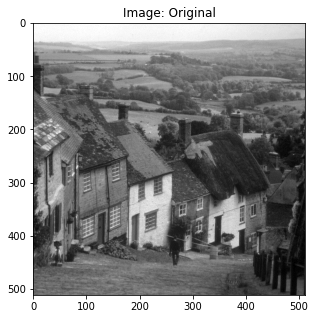

In [6]:
fig, plot = plt.subplots(1, 1, figsize = (10, 5))

plot.imshow(img, cmap='gray')
plot.set_title("Image: Original")

Text(0.5, 1.0, 'Image: Downsampled - Average Filtered')

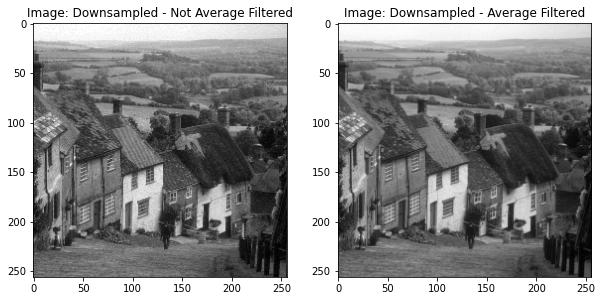

In [7]:
# Downsampled Images
fig, plot = plt.subplots(1, 2, figsize = (10, 15))

downsampled_image_without_average_filter = downsample(img, 2, False)

plot[0].imshow(downsampled_image_without_average_filter, cmap='gray')
plot[0].set_title("Image: Downsampled - Not Average Filtered")

downsampled_image_with_average_filter = downsample(img, 2, True)

plot[1].imshow(downsampled_image_with_average_filter, cmap='gray')
plot[1].set_title("Image: Downsampled - Average Filtered")

Text(0.5, 1.0, 'Image: Upsampled - Bilinear Interpolation - Average Filtered')

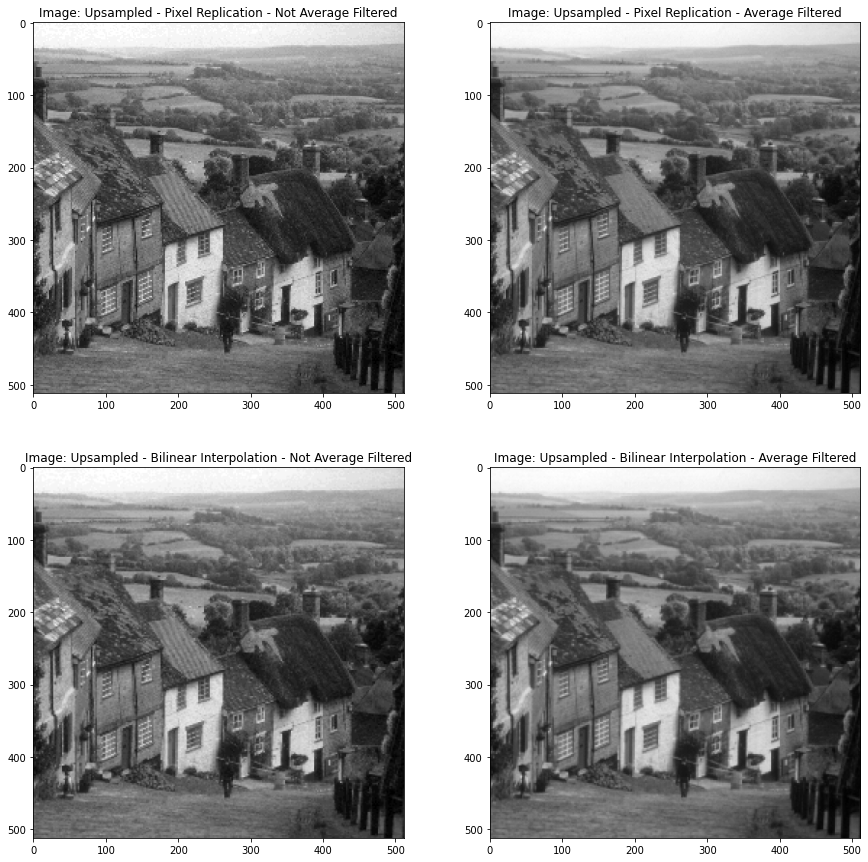

In [8]:
# Upsampled Images
fig, plot = plt.subplots(2, 2, figsize = (15, 15))

upsampled_image_with_pixel_replication_without_average_filter = upsample(downsampled_image_without_average_filter, 2, False)

plot[0][0].imshow(upsampled_image_with_pixel_replication_without_average_filter, cmap='gray')
plot[0][0].set_title("Image: Upsampled - Pixel Replication - Not Average Filtered")

upsampled_image_with_pixel_replication_with_average_filter = upsample(downsampled_image_with_average_filter, 2, False)

plot[0][1].imshow(upsampled_image_with_pixel_replication_with_average_filter, cmap='gray')
plot[0][1].set_title("Image: Upsampled - Pixel Replication - Average Filtered")

upsampled_image_with_bilinear_interpolation_without_average_filter = upsample(downsampled_image_without_average_filter, 2, True)

plot[1][0].imshow(upsampled_image_with_bilinear_interpolation_without_average_filter, cmap='gray')
plot[1][0].set_title("Image: Upsampled - Bilinear Interpolation - Not Average Filtered")

upsampled_image_with_bilinear_interpolation_with_average_filter = upsample(downsampled_image_with_average_filter, 2, True)

plot[1][1].imshow(upsampled_image_with_bilinear_interpolation_with_average_filter, cmap='gray')
plot[1][1].set_title("Image: Upsampled - Bilinear Interpolation - Average Filtered")

Text(0.5, 1.0, 'Image: Upsampled - Bilinear Interpolation - Average Filtered - Zoomed')

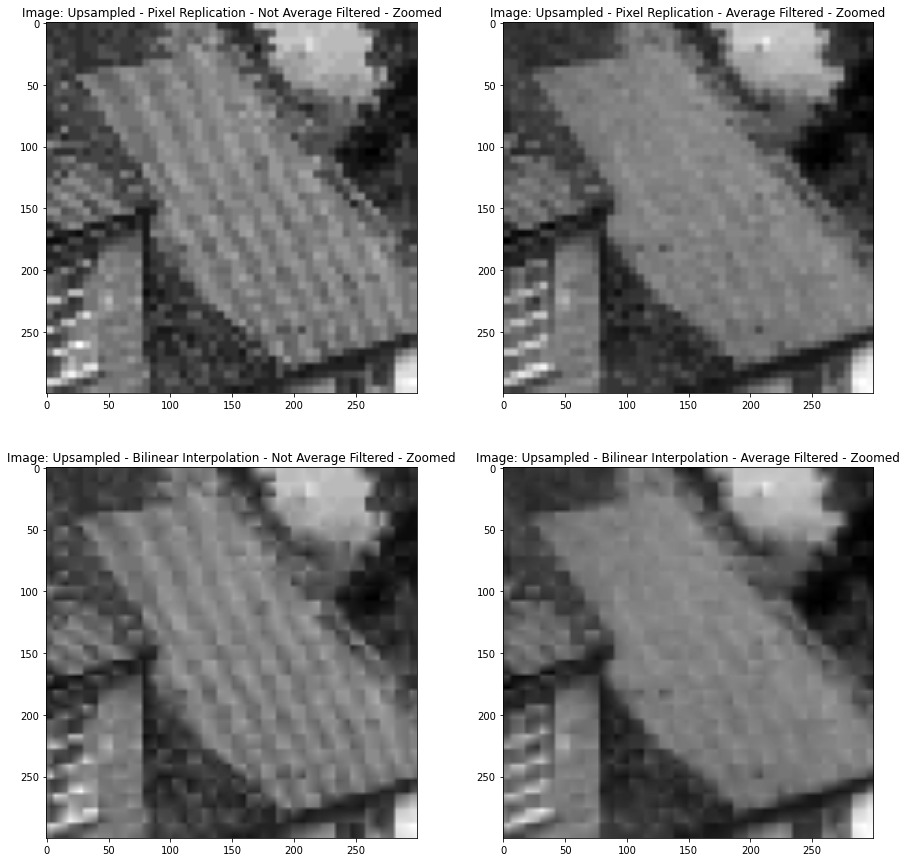

In [9]:
# Zoomed Upsampled Images

fig, plot = plt.subplots(2, 2, figsize = (15, 15))

plot[0][0].imshow(zoom(upsampled_image_with_pixel_replication_without_average_filter[200:300, 150:250], 3), cmap='gray')
plot[0][0].set_title("Image: Upsampled - Pixel Replication - Not Average Filtered - Zoomed")

plot[0][1].imshow(zoom(upsampled_image_with_pixel_replication_with_average_filter[200:300, 150:250], 3), cmap='gray')
plot[0][1].set_title("Image: Upsampled - Pixel Replication - Average Filtered - Zoomed")

plot[1][0].imshow(zoom(upsampled_image_with_bilinear_interpolation_without_average_filter[200:300, 150:250], 3), cmap='gray')
plot[1][0].set_title("Image: Upsampled - Bilinear Interpolation - Not Average Filtered - Zoomed")

plot[1][1].imshow(zoom(upsampled_image_with_bilinear_interpolation_with_average_filter[200:300, 150:250], 3), cmap='gray')
plot[1][1].set_title("Image: Upsampled - Bilinear Interpolation - Average Filtered - Zoomed")

In [10]:
# Mean Square Error

mse_upsampled_image_with_pixel_replication_without_average_filter = mean_squared_error(upsampled_image_with_pixel_replication_without_average_filter, img)
mse_upsampled_image_with_pixel_replication_with_average_filter = mean_squared_error(upsampled_image_with_pixel_replication_with_average_filter, img)
mse_upsampled_image_with_bilinear_interpolation_without_average_filter = mean_squared_error(upsampled_image_with_bilinear_interpolation_without_average_filter, img)
mse_upsampled_image_with_bilinear_interpolation_with_average_filter = mean_squared_error(upsampled_image_with_bilinear_interpolation_with_average_filter, img)

# Pixel Replication Upsampling
print("Pixel Replication")
print("Without Average Filter = " + str(mse_upsampled_image_with_pixel_replication_without_average_filter))
print("With Average Filter = " + str(mse_upsampled_image_with_pixel_replication_with_average_filter))

# Bilinear Interpolation Upsampling
print("\nBilinear Interpolation")
print("Without Average Filter = " + str(mse_upsampled_image_with_bilinear_interpolation_without_average_filter))
print("With Average Filter = " + str(mse_upsampled_image_with_bilinear_interpolation_with_average_filter))

Pixel Replication
Without Average Filter = 133.075927734375
With Average Filter = 65.97711181640625

Bilinear Interpolation
Without Average Filter = 111.63640213012695
With Average Filter = 67.52307510375977
